In [1]:
#We start by importing the necessary modules
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns


#We create a dataframe made of the data from the csv file
data = pd.read_csv('all_data.csv')

In [2]:
#Getting to know better the dataset

print(data.shape)
print(data.head())
print(data[data.Country == 'United States of America'])
print(data.Country.unique())
print(data.Year.unique())

#these few steps taught us that: 
#we have 96 rows and 4 columns 
#the 96 rows represent 16 annual observations from 2000 to 2015 for 6 countries (6*16=96)
#the indicators considered for each country are life expectancy at birth and GDP

(96, 4)
  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10
                     Country  Year  Life expectancy at birth (years)  \
64  United States of America  2000                              76.8   
65  United States of America  2001                              76.9   
66  United States of America  2002                              77.0   
67  United States of America  2003                              77.2   
68  United States of America  2004                              77.5   
69  United States of America  2005                              77.5   
70  United States of America  2006                              77.8   
71  United States of America  20

In [3]:
#dataset finetuning: the GDP is shown in dollars, for better readability, we will convert it in BILLIONS of dollars

data.rename(columns = {'GDP': 'GDP_B'},inplace = True)
data.GDP_B = data.GDP_B.apply(lambda x: x/1000000000)

print(data)

     Country  Year  Life expectancy at birth (years)      GDP_B
0      Chile  2000                              77.3  77.860932
1      Chile  2001                              77.3  70.979924
2      Chile  2002                              77.8  69.736811
3      Chile  2003                              77.9  75.643460
4      Chile  2004                              78.0  99.210393
..       ...   ...                               ...        ...
91  Zimbabwe  2011                              54.9  12.098451
92  Zimbabwe  2012                              56.6  14.242490
93  Zimbabwe  2013                              58.0  15.451769
94  Zimbabwe  2014                              59.2  15.891049
95  Zimbabwe  2015                              60.7  16.304668

[96 rows x 4 columns]


In [4]:
#before starting to make some plots, we apply the describe function to highlight some general trends in the data 
print(data.describe())

#insights we can draw from the describe table:
#the spread of the 25% of lowest life expectancies is 30 years, while the spread of the 75% highest is 6.5 years only
#meaning that we have one or more low outliers and apart from that most life expectancy data are concentrated in a restricted range
#when it comes to GDP, we obviously have low and high outliers, shown by the min and max values as well as the respective high ratio with the 25% boundary and the 75% boundary
# within the 25%-75% range, we seem to have quite a large spread, the upper boundary being ~21 times the lower boundary

              Year  Life expectancy at birth (years)         GDP_B
count    96.000000                         96.000000     96.000000
mean   2007.500000                         72.789583   3880.498571
std       4.633971                         10.672882   5197.561311
min    2000.000000                         44.300000      4.415703
25%    2003.750000                         74.475000    173.301750
50%    2007.500000                         76.750000   1280.220000
75%    2011.250000                         78.900000   4067.510000
max    2015.000000                         81.000000  18100.000000


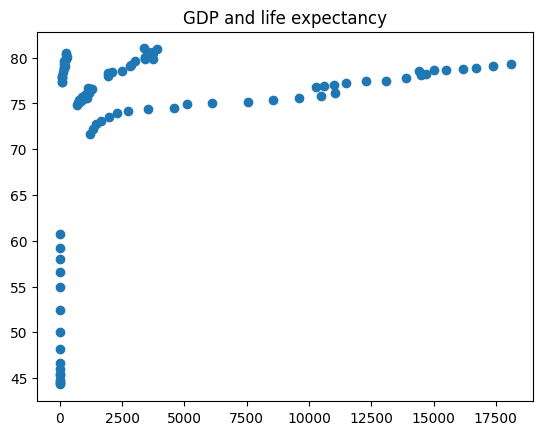

<Figure size 640x480 with 0 Axes>

In [5]:
#Are GDP and life expectancy related?

plt.scatter(data['GDP_B'],data['Life expectancy at birth (years)'])
plt.title('GDP and life expectancy')
plt.show()
plt.clf()

#the relationship doesn't seem obvious. Given the structure of the dataset provided, making this test doesn't really make sense
#...for the reason that GDP isn't related to population and therefore isn't giving a proper estimate 
#...of the individual life level in the country

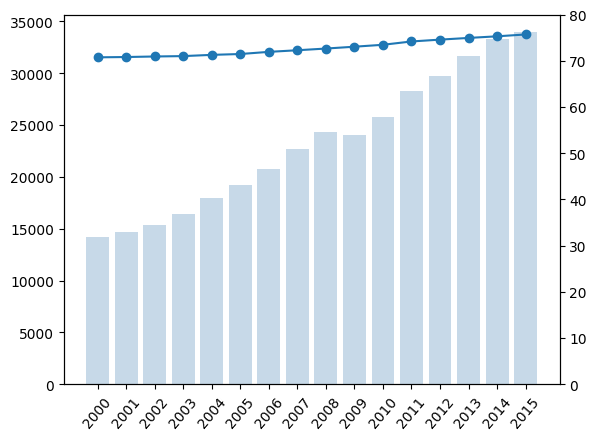

<Figure size 640x480 with 0 Axes>

In [6]:
#Taking now a chronological approach. Without looking yet at specific countries, we will evaluate the overall progression of TOTAL GDP and MEAN life expectancy
GDP_SUM = data.groupby('Year')['GDP_B'].sum()
LE_AVERAGE = data.groupby('Year')['Life expectancy at birth (years)'].mean()
years = [2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015]

#We plot a figure which combines a line, showing the evolution of average life expectancy 
#...and a bar diagram, which shows the evolution of the total GDP

ax1 = plt.subplot()
ax1.bar(years,GDP_SUM,alpha = 0.3,color = 'steelblue')
ax2 = ax1.twinx()
ax2.plot(years,LE_AVERAGE,linestyle ='solid',marker ='o')
ax2.set_ylim([0,80])
ax1.set_xticks(years)
ax1.set_xticklabels(years, rotation = 50)
plt.show()
plt.clf()

# what we can observe is a steady growth of the total GDP and a very slow-paced growth of the average life expectancy in the mean time

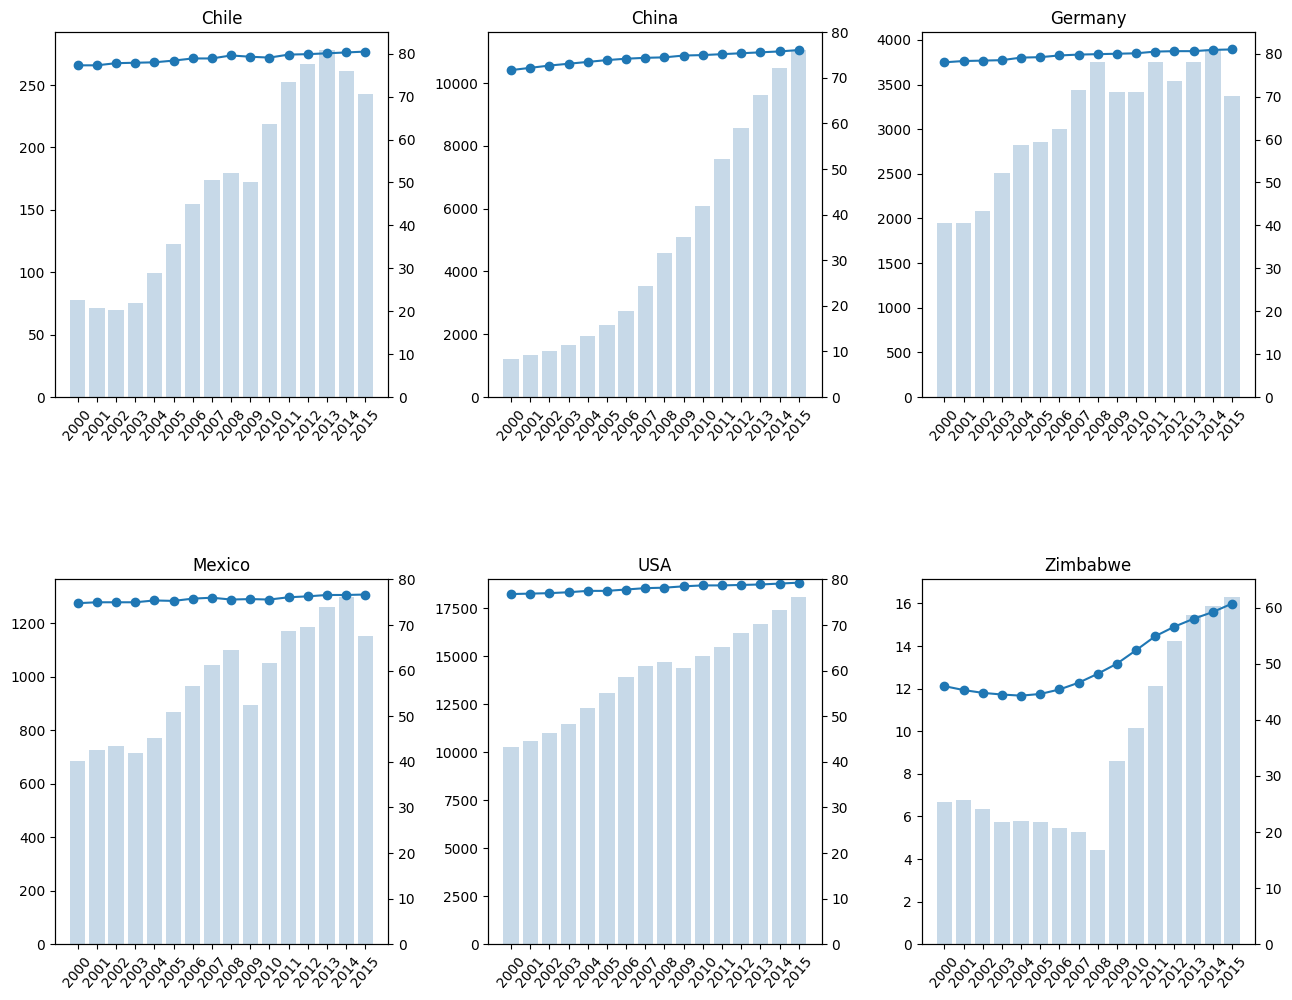

<Figure size 640x480 with 0 Axes>

In [7]:
#We will reproduce just what we did in the previous step, but this time, we will look at each separate country
#can we see any pattern?

ax1 = plt.subplot(2,3,1)
ax1.bar(years,data[data.Country == 'Chile']['GDP_B'],alpha = 0.3, color = 'steelblue')
ax2 = ax1.twinx()
ax2.plot(years,data[data.Country == 'Chile']['Life expectancy at birth (years)'],linestyle ='solid',marker ='o')
ax2.set_ylim([0,85])
ax1.set_xticks(years)
ax1.set_xticklabels(years, rotation = 50)
plt.title('Chile')


ax1 = plt.subplot(2,3,2)
ax1.bar(years,data[data.Country == 'China']['GDP_B'],alpha = 0.3, color = 'steelblue')
ax2 = ax1.twinx()
ax2.plot(years,data[data.Country == 'China']['Life expectancy at birth (years)'],linestyle ='solid',marker ='o')
ax2.set_ylim([0,80])
ax1.set_xticks(years)
ax1.set_xticklabels(years, rotation = 50)
plt.title('China')


ax1 = plt.subplot(2,3,3)
ax1.bar(years,data[data.Country == 'Germany']['GDP_B'],alpha = 0.3, color = 'steelblue')
ax2 = ax1.twinx()
ax2.plot(years,data[data.Country == 'Germany']['Life expectancy at birth (years)'],linestyle ='solid',marker ='o')
ax2.set_ylim([0,85])
ax1.set_xticks(years)
ax1.set_xticklabels(years, rotation = 50)
plt.title('Germany')


ax1 = plt.subplot(2,3,4)
ax1.bar(years,data[data.Country == 'Mexico']['GDP_B'],alpha = 0.3, color = 'steelblue')
ax2 = ax1.twinx()
ax2.plot(years,data[data.Country == 'Mexico']['Life expectancy at birth (years)'],linestyle ='solid',marker ='o')
ax2.set_ylim([0,80])
ax1.set_xticks(years)
ax1.set_xticklabels(years, rotation = 50)
plt.title('Mexico')


ax1 = plt.subplot(2,3,5)
ax1.bar(years,data[data.Country == 'United States of America']['GDP_B'],alpha = 0.3, color = 'steelblue')
ax2 = ax1.twinx()
ax2.plot(years,data[data.Country == 'United States of America']['Life expectancy at birth (years)'],linestyle ='solid',marker ='o')
ax2.set_ylim([0,80])
ax1.set_xticks(years)
ax1.set_xticklabels(years, rotation = 50)
plt.title('USA')


ax1 = plt.subplot(2,3,6)
ax1.bar(years,data[data.Country == 'Zimbabwe']['GDP_B'],alpha = 0.3, color = 'steelblue')
ax2 = ax1.twinx()
ax2.plot(years,data[data.Country == 'Zimbabwe']['Life expectancy at birth (years)'],linestyle ='solid',marker ='o')
ax2.set_ylim([0,65])
ax1.set_xticks(years)
ax1.set_xticklabels(years, rotation = 50)
plt.title('Zimbabwe')




plt.subplots_adjust(top = 2, hspace = 0.5, right = 2,bottom = 0.1,wspace = 0.3)

plt.show()
plt.clf()


#Regarding the life expectancy, a pattern of growth at a very small pace applies to all countries
#...with the single exception of Zimbabwe, where we witness a strong growth of the life expectancy over the period

#All countries show a strong growth of the GDP over the period, although of differents scales
#No country except China shows a growth of the GDP without interruption over the whole period

In [8]:
#Let's quantify our observations of previous steps
#We will add in the dataframe two measurements for each of the indicators considered: first is the YoY growth of the indicator
#...second is the cumulated growth since the start of the period

print(data[data.Country == 'China'].GDP_B[25])

YoY_GDP = []
Cumul_GDP = []
YoY_LE = []
Cumul_LE = []


   
import numpy as np
mult=0
for country in data.Country.unique():
    YoY_GDP.append(np.NaN)
    Cumul_GDP.append(np.NaN)
    YoY_LE.append(np.NaN)
    Cumul_LE.append(np.NaN)
    i=1    
    
    while i<16:
        YoY_GDP.append(100*round((data[data.Country == country].GDP_B[i+(16*mult)]-data[data.Country == country].GDP_B[i-1+(16*mult)])/data[data.Country == country].GDP_B[i-1+(16*mult)],3))
        Cumul_GDP.append(100*round((data[data.Country == country].GDP_B[i+(16*mult)]-data[data.Country == country].GDP_B[16*mult])/data[data.Country == country].GDP_B[16*mult],3))
        YoY_LE.append(100*round((data[data.Country == country]['Life expectancy at birth (years)'][i+(16*mult)]-data[data.Country == country]['Life expectancy at birth (years)'][i-1+(16*mult)])/data[data.Country == country]['Life expectancy at birth (years)'][i-1+(16*mult)],3))
        Cumul_LE.append(100*round((data[data.Country == country]['Life expectancy at birth (years)'][i+(16*mult)]-data[data.Country == country]['Life expectancy at birth (years)'][16*mult])/data[data.Country == country]['Life expectancy at birth (years)'][16*mult],3))
        i+=1
    mult+=1
        


data['YoY_GDP (%)'] = YoY_GDP
data['Cumul_GDP (%)'] = Cumul_GDP
data['YoY_LE (%)'] = YoY_LE
data['Cumul_LE (%)'] = Cumul_LE

data = data.reindex(columns = ['Country', 'Year','Life expectancy at birth (years)', 'YoY_LE (%)','Cumul_LE (%)','GDP_B', 'YoY_GDP (%)', 'Cumul_GDP (%)'])
print(data)


5109.95
     Country  Year  Life expectancy at birth (years)  YoY_LE (%)  \
0      Chile  2000                              77.3         NaN   
1      Chile  2001                              77.3         0.0   
2      Chile  2002                              77.8         0.6   
3      Chile  2003                              77.9         0.1   
4      Chile  2004                              78.0         0.1   
..       ...   ...                               ...         ...   
91  Zimbabwe  2011                              54.9         4.8   
92  Zimbabwe  2012                              56.6         3.1   
93  Zimbabwe  2013                              58.0         2.5   
94  Zimbabwe  2014                              59.2         2.1   
95  Zimbabwe  2015                              60.7         2.5   

    Cumul_LE (%)      GDP_B  YoY_GDP (%)  Cumul_GDP (%)  
0            NaN  77.860932          NaN            NaN  
1            0.0  70.979924         -8.8           -8.8  
2

In [9]:
#What are the respective mean yearly growths of GDP, life expectancy, for each country?
print('Mean growth of GDP, per country')
print(data.groupby('Country')['YoY_GDP (%)'].mean())

print('Mean growth of life expectancy, per country')
print(data.groupby('Country')['YoY_LE (%)'].mean())

#The countries that started with the highest GDP (USA and Germany) had the lowest average growths of GDP. China had the strongest
#Zimbabwe was the only country to display a significant average growth of life expectancy, at 1.9%

#For each indicator, what are the smallest and the biggest growths over the period?
sub_2015 = data[data.Year == 2015][['Country', 'Cumul_GDP (%)', 'Cumul_LE (%)']]
print(sub_2015)


#China multiplied its GDP by more than 9, Mexico had the weakest economic growth, closely followed by the US and Germany
#When it comes to life expectancy, we have the same 3 countries with the least progress, while Zimbabwe added one third to its citizens' life expectancy

print(data[data.Country == 'Zimbabwe'])

Mean growth of GDP, per country
Country
Chile                        8.640000
China                       16.093333
Germany                      4.100000
Mexico                       3.966667
United States of America     3.853333
Zimbabwe                     8.306667
Name: YoY_GDP (%), dtype: float64
Mean growth of life expectancy, per country
Country
Chile                       0.253333
China                       0.400000
Germany                     0.246667
Mexico                      0.180000
United States of America    0.220000
Zimbabwe                    1.886667
Name: YoY_LE (%), dtype: float64
                     Country  Cumul_GDP (%)  Cumul_LE (%)
15                     Chile          211.5           4.1
31                     China          813.4           6.1
47                   Germany           73.1           3.8
63                    Mexico           68.5           2.5
79  United States of America           75.7           3.3
95                  Zimbabwe          143.7

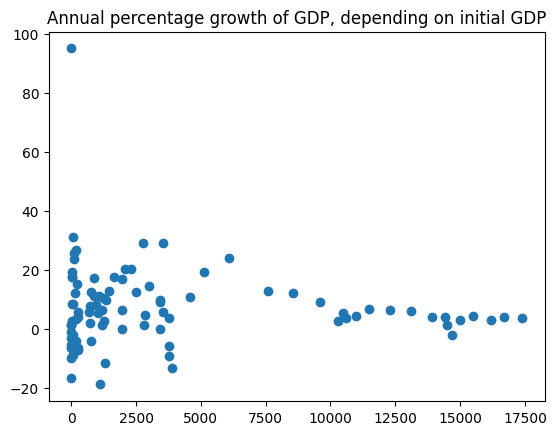

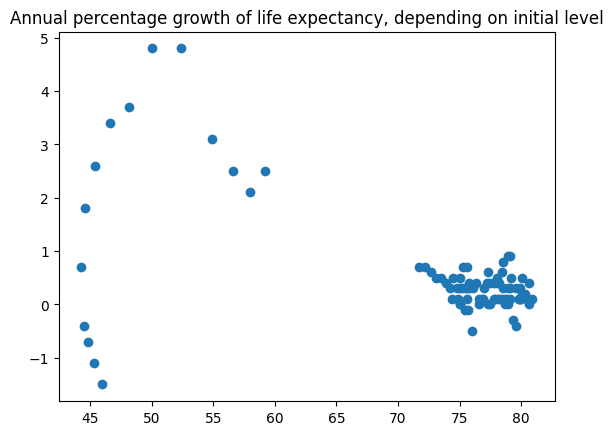

<Figure size 640x480 with 0 Axes>

In [10]:
# While it is tempting to say that Zimbabwe, China, Chile performed well in term of one or both of these indicators, 
#...when Mexico, Germany and the US performed poorly, one should still question whether there is not at play some "compensation"
#...effect, and if it is not "easier" to do gains when starting from a low level, whereas on the opposite once a certain level is
#...reached, marginal gains become more and more difficult to obtain

#Can we assume a negative correlation between the level at the start and the progresses made afterwards?

plt.scatter(data['GDP_B'][:-1],data['YoY_GDP (%)'][1:])
plt.title('Annual percentage growth of GDP, depending on initial GDP')
plt.show()
plt.clf()

plt.scatter(data['Life expectancy at birth (years)'][:-1],data['YoY_LE (%)'][1:])
plt.title('Annual percentage growth of life expectancy, depending on initial level')
plt.show()
plt.clf()


#There appears to be a moderate negative relationship between base GDP and annual % growth
#When it comes to life expectancy,the result is unequivocal: high life expectancy associates to lower progress potential

CONCLUSION

The dataset we looked at compares the performances of 6 countries between 2000 and 2015, concerning the GDP and the life expectancy at birth.

In this context, checking the relationship between GDP and life expectancy doesn't make sense because the countries have (had) various populations, which are not given in the dataset. Therefore we are not able to estimate the relationship between INDIVIDUAL standard of living and life expectancy.

What is more interesting with this dataset is to take a time approach and observe the RELATIVE evolutions of these indicators.

The first thing that we were able to highlight is that in every single country both of the indicators grew over the whole period. But the GDP grew at a much stronger pace than the life expectancy, which realized only marginal progress. 

If we look at country level, we observe that Zimbabwe breaks the pattern of unsignificant growth of the life expectancy, while the other countries respect it. In terms of economic growth, all countries grew but with strong contrasts of scales. China, and to a lesser extent Chile and Zimbabwe, grew strongly, while Germany, Mexico and the US had a relatively moderate growth, falling short of doubling their initial GDP. 

This led us to test the hypothesis of whether it is easier to make economic and life expectancy improvements when starting from a low level. Economic growth year over year tends to be negatively correlated with the base GDP, but only to a small extent. While margin of improvement of life expectancy does correlate strongly with low starting level.

These conclusions correspond with what common sense suggests: there are biological boundaries that our technological and health advance can not, at least for now, allow us to cross in order to further increase our life expectancy. For economically-developed countries, there are still growth opportunities to capture, through innovation and gains of market share over competitors, but when starting from an undeveloped or transitional level all needs to be built and the ways to do economic progress are more obvious. 

These insights however are drawn from a limited dataset and would benefit from being consolidated by data from more countries and over more years.